<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

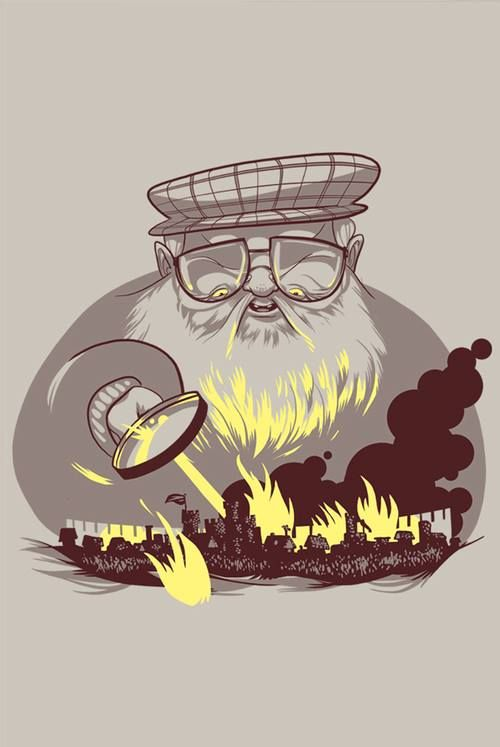

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [91]:
df_train = pd.read_csv("DLS/game_of_thrones_train.csv", index_col='S.No')
df_test = pd.read_csv("DLS/game_of_thrones_test.csv", index_col='S.No')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

 **Задание 1.3.** Предобработка (очистка) данных.
    
 Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<Axes: xlabel='S.No'>

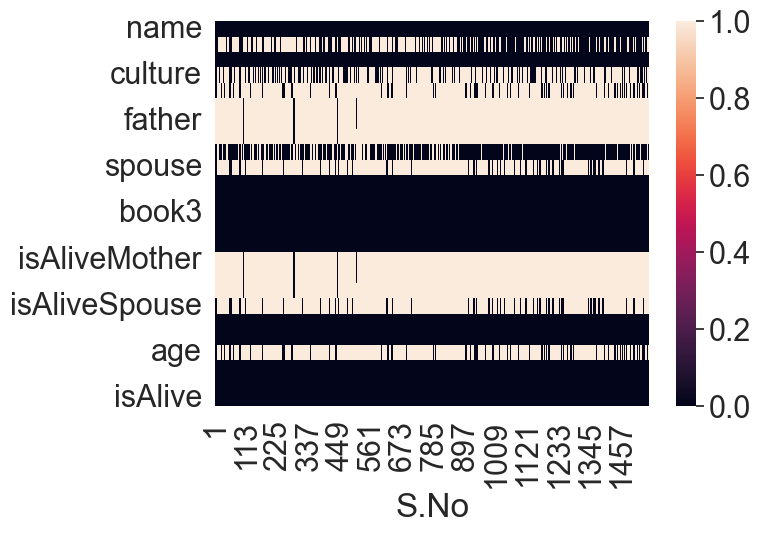

In [92]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())

<Axes: xlabel='S.No'>

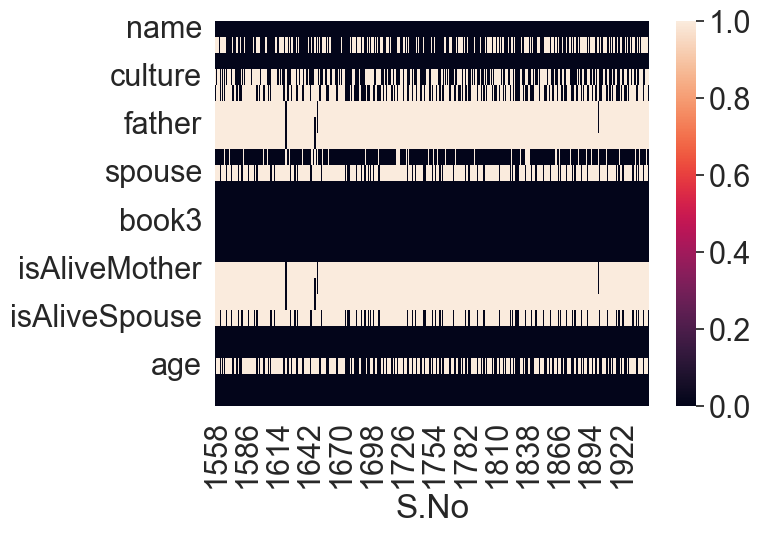

In [93]:
plt.figure(figsize=(7,5))
sns.heatmap(df_test.isna().transpose())

## house сохраняем самые популярные в первой четверти дома и находим пересечение между test и train
## Нули заменяем на No info, все, что не входят в пересечение: Rare

In [95]:
df_train['house'].fillna('No info', inplace=True)
df_train['house'] = df_train['house'].replace(df_train[~df_train['house'].isin(
    df_train['house'].value_counts().keys().to_list()[:int(
        df_train['house'].value_counts().shape[0] * 0.25)])]['house'].tolist(), 'Rare')   
df_train['house'].value_counts()

df_test['house'].fillna('No info', inplace=True)
df_test['house'] = df_test['house'].replace(df_test[~df_test['house'].isin(
    df_test['house'].value_counts().keys().to_list()[
    :int(df_test['house'].value_counts().shape[0] * 0.25)])]['house'].tolist(), 'Rare')   
df_test['house'].value_counts()

print(f"TRAIN {df_train['house'].value_counts()[:int(df_train['house'].value_counts().shape[0] * 0.25)]}\n")
print(f"TEST {df_test['house'].value_counts()[:int(df_test['house'].value_counts().shape[0] * 0.25)]}\n")
df_intersects = df_train['house'].value_counts()[:int(df_train['house'].value_counts().shape[0] * 0.25)][
    df_train['house'].value_counts().keys()[:int(df_train['house'].value_counts().shape[0] * 0.25)].isin(
        df_test['house'].value_counts().keys()[:int(df_test['house'].value_counts().shape[0] * 0.25)])]
print(f"INTERSECTS {df_intersects}")

TRAIN house
No info               381
Rare                  363
House Frey             89
Night's Watch          88
House Stark            56
House Targaryen        40
House Lannister        36
House Tyrell           33
House Greyjoy          30
House Osgrey           20
Faith of the Seven     15
House Hightower        12
House Botley           12
House Arryn            11
House Martell          11
House Crakehall        10
House Florent          10
House Bracken           9
House Waynwood          9
House Velaryon          8
Name: count, dtype: int64

TEST house
Rare               129
No info             46
House Targaryen     22
House Martell       18
Night's Watch       17
House Stark         16
House Lannister     13
House Greyjoy       11
Name: count, dtype: int64

INTERSECTS house
No info            381
Rare               363
Night's Watch       88
House Stark         56
House Targaryen     40
House Lannister     36
House Greyjoy       30
House Martell       11
Name: count, dtype

In [96]:
df_train['house'] = df_train['house'].replace(df_train[~df_train['house'].isin(
    df_intersects.keys().to_list())]['house'].tolist(), 'Rare')  

df_test['house'] = df_test['house'].replace(df_test[~df_test['house'].isin(
    df_intersects.keys().to_list())]['house'].tolist(), 'Rare')  

print(f"TRAIN {df_train['house'].value_counts()}\n")
print(f"TEST {df_test['house'].value_counts()}")


TRAIN house
Rare               915
No info            381
Night's Watch       88
House Stark         56
House Targaryen     40
House Lannister     36
House Greyjoy       30
House Martell       11
Name: count, dtype: int64

TEST house
Rare               246
No info             46
House Targaryen     22
House Martell       18
Night's Watch       17
House Stark         16
House Lannister     13
House Greyjoy       11
Name: count, dtype: int64


## В title оставляем первые 3 титула, потому что они чаще всего встречаются в train и test и на их пересечении
## Нули заменяем на No info, все, что не входят в пересечение: Rare

In [97]:
print(f"TRAIN {df_train['title'].value_counts()}\n")
print(f"TEST {df_test['title'].value_counts()}")

TRAIN title
Ser                   306
Maester                29
Archmaester            21
Lord                   19
Septon                 16
                     ... 
Sweetport Sound         1
Lord of Greyshield      1
Felwood                 1
Goldgrass               1
Highgarden              1
Name: count, Length: 195, dtype: int64

TEST title
Ser                      78
Maester                  10
Princess                  7
Bloodrider                3
Knight                    3
                         ..
Lord Steward              1
The NorreyLord Norrey     1
Lord of Blackhaven        1
Blacktyde                 1
Slave of R'hllor          1
Name: count, Length: 109, dtype: int64


In [98]:
df_train['title'].fillna('No info', inplace=True)
df_train['title'] = df_train['title'].replace(df_train[~df_train['title'].isin(
    df_train['title'].value_counts().keys().to_list()[:3])]['title'].tolist(), 'Rare')  

df_test['title'].fillna('No info', inplace=True)
df_test['title'] = df_test['title'].replace(df_test[~df_test['title'].isin(
    df_test['title'].value_counts().keys().to_list()[:3])]['title'].tolist(), 'Rare')  

print(f"TRAIN {df_train['title'].value_counts()}\n")
print(f"TEST {df_test['title'].value_counts()}")

TRAIN title
No info    840
Rare       382
Ser        306
Maester     29
Name: count, dtype: int64

TEST title
No info    168
Rare       133
Ser         78
Maester     10
Name: count, dtype: int64


## NaN в age заменяем на медиану

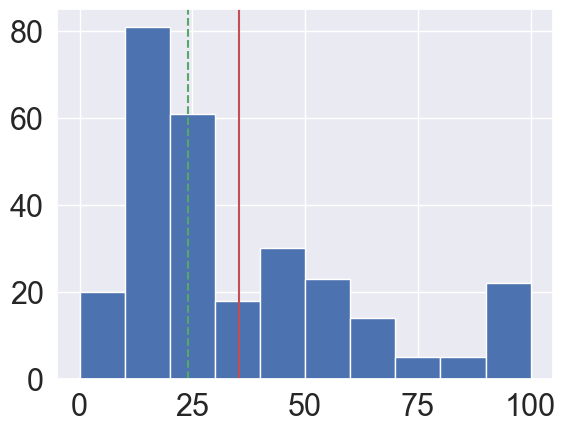

In [99]:
mean_Age = np.mean(df_train['age'].dropna().values)
median_Age = np.quantile(df_train['age'].dropna().values,q=0.5)

plt.hist(df_train['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

## В test есть два выброса, меняем их на NaN, чтобы потом заменить на медиану

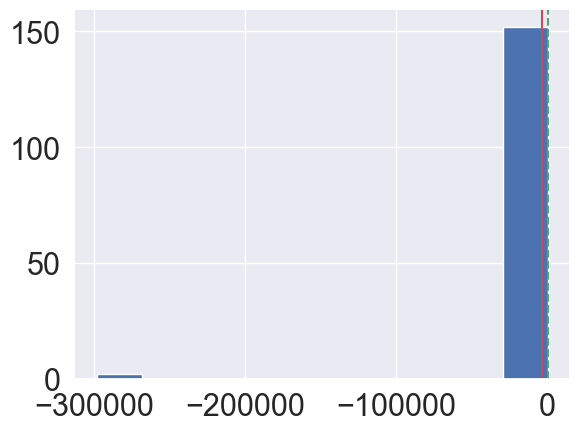

In [100]:
mean_Age_test = np.mean(df_test['age'].dropna().values)
median_Age_test = np.quantile(df_test['age'].dropna().values,q=0.5)

plt.hist(df_test['age'])

plt.axvline(x=mean_Age_test, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age_test, color='g', linestyle = '--', label='median')


In [101]:
df_test[(df_test['age'].notna()) & (df_test['age'] < 0)]['age']

S.No
1685   -277980.0
1869   -298001.0
Name: age, dtype: float64

In [102]:
df_test.loc[[1685,1869],'age'] = np.nan

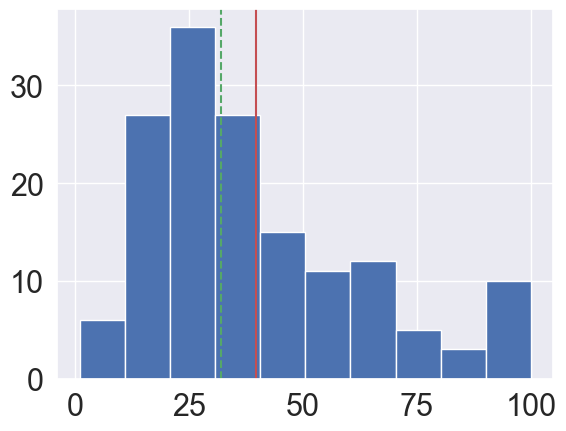

In [103]:
mean_Age_test = np.mean(df_test['age'].dropna().values)
median_Age_test = np.quantile(df_test['age'].dropna().values,q=0.5)

plt.hist(df_test['age'])

plt.axvline(x=mean_Age_test, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age_test, color='g', linestyle = '--', label='median')

In [104]:
df_test['age'].fillna(median_Age, inplace=True)
df_train['age'].fillna(median_Age, inplace=True)

## drop столбцы, имеющие слишком много пропусков

In [105]:
df_train.drop(['spouse', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth'], 
              axis = 1, inplace = True)
df_test.drop(['spouse', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth'], 
              axis = 1, inplace = True)

<Axes: xlabel='S.No'>

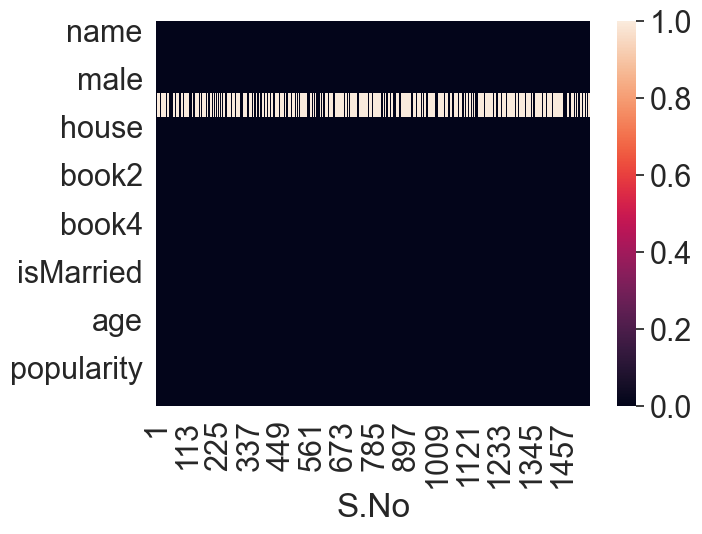

In [106]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [107]:
df_train.loc[df_train['popularity'] >= 0.5, 'popularity'] = 1
df_train.loc[df_train['popularity'] != 1, 'popularity'] = 0

df_train.loc[df_train['numDeadRelations'] > 0, 'numDeadRelations'] = 1
df_train = df_train.rename(columns={'numDeadRelations': 'boolDeadRelations', 
                                    'popularity': 'isPopular'})

df_test.loc[df_test['popularity'] >= 0.5, 'popularity'] = 1
df_test.loc[df_test['popularity'] != 1, 'popularity'] = 0

df_test.loc[df_test['numDeadRelations'] > 0, 'numDeadRelations'] = 1
df_test = df_test.rename(columns={'numDeadRelations': 'boolDeadRelations', 
                                    'popularity': 'isPopular'})

In [108]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

culture_col = df_train['culture']
for key in cult:
    for index in culture_col.index:
        if culture_col[index] in cult[key]:
            culture_col[index] = key
df_train['culture'] = culture_col

culture_col = df_test['culture']
for key in cult:
    for index in culture_col.index:
        if culture_col[index] in cult[key]:
            culture_col[index] = key
df_test['culture'] = culture_col

C:\Users\Санек\AppData\Local\Temp\ipykernel_10628\2797312281.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_col[index] = key
C:\Users\Санек\AppData\Local\Temp\ipykernel_10628\2797312281.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_col[index] = key
C:\Users\Санек\AppData\Local\Temp\ipykernel_10628\2797312281.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_col[index] = key
C:\Users\Санек\AppData

## В culture оставляем четверть от пересечения, потому что они чаще всего встречаются в train и test и на их пересечении
## Нули заменяем на No info, все, что не входят в пересечение: Rare

In [109]:
df_train['culture'].fillna('No info', inplace=True)
df_train['culture'] = df_train['culture'].replace(df_train[~df_train['culture'].isin(
    df_train['culture'].value_counts().keys().to_list())]['culture'].tolist(), 'Rare')   
df_train['culture'].value_counts()

df_test['culture'].fillna('No info', inplace=True)
df_test['culture'] = df_test['culture'].replace(df_test[~df_test['culture'].isin(
    df_test['culture'].value_counts().keys().to_list())]['culture'].tolist(), 'Rare')   
df_test['culture'].value_counts()

print(f"TRAIN {df_train['culture'].value_counts()}\n")
print(f"TEST {df_test['culture'].value_counts()}\n")

df_intersects = df_train['culture'].value_counts()[
    df_train['culture'].value_counts().keys().isin(
        df_test['culture'].value_counts().keys())]
print(f"INTERSECTS {df_intersects[:int(df_intersects.shape[0] * 0.25)]}")

TRAIN culture
No info                    1069
Northmen                    103
Ironborn                     91
Free Folk                    46
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Westermen                     5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Northern mountain clans       3
Dornishmen                    3
Westeros                      3
Ironmen                       3
First Men                     2
Meereenese                    2
Crannogmen                    2
Lysene                        2
Myrish                        2
Sistermen                 

In [110]:
df_intersects = df_intersects[:int(df_intersects.shape[0] * 0.25)]

In [111]:
df_train['culture'] = df_train['culture'].replace(df_train[~df_train['culture'].isin(
    df_intersects.keys().to_list())]['culture'].tolist(), 'Rare')  

df_test['culture'] = df_test['culture'].replace(df_test[~df_test['culture'].isin(
    df_intersects.keys().to_list())]['culture'].tolist(), 'Rare')  

print(f"TRAIN {df_train['culture'].value_counts()}\n")
print(f"TEST {df_test['culture'].value_counts()}")


TRAIN culture
No info      1069
Rare          130
Northmen      103
Ironborn       91
Free Folk      46
Braavosi       39
Valyrian       28
Dornish        17
Dothraki       17
Ghiscari       17
Name: count, dtype: int64

TEST culture
No info      200
Rare          92
Northmen      30
Ironborn      21
Valyrian      15
Dornish        8
Ghiscari       8
Free Folk      6
Dothraki       6
Braavosi       3
Name: count, dtype: int64


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [112]:
df_train.sample(10)

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,boolDeadRelations,isPopular,isAlive
S.No,,,,,,,,,,,,,,,,
1428,Vylarr,Rare,1,No info,House Lannister,0,1,1,1,1,0,1,24.0,0,0.0,1
296,Alaric of Eysen,No info,0,No info,No info,0,0,1,1,0,0,0,24.0,0,0.0,1
444,Dan,No info,1,Free Folk,No info,0,0,1,1,0,0,0,24.0,0,0.0,1
1307,Regenard Estren,Rare,0,No info,Rare,1,0,1,1,1,0,1,24.0,0,0.0,1
475,Dyah,No info,0,Free Folk,No info,0,0,1,1,0,1,0,24.0,0,0.0,1
548,Gretchel,No info,1,No info,Rare,0,0,0,1,1,0,0,24.0,0,0.0,1
731,Lymond Mallister,Rare,0,No info,Rare,0,0,0,0,0,0,1,24.0,0,0.0,1
1361,Shella Whent,Rare,0,Rare,Rare,1,1,1,1,1,1,1,24.0,1,0.0,0
42,Young Henly,No info,1,No info,Night's Watch,0,0,1,0,0,0,0,59.0,0,0.0,0


In [113]:
df_train.drop(columns=['name'], inplace = True)
df_test.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

1's counts = 77.84200385356455%


<Axes: >

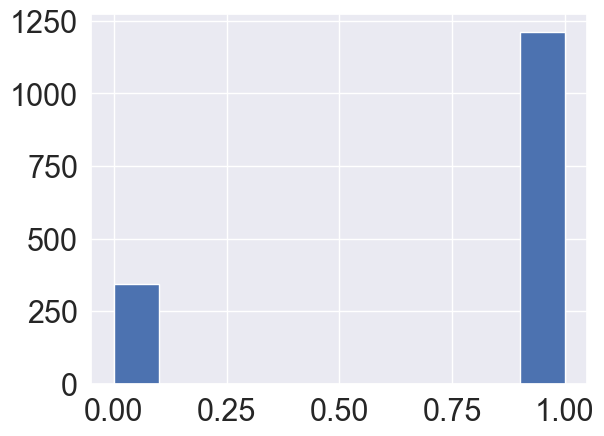

In [114]:
print(f"1's counts = {df_train['isAlive'].value_counts()[1]/df_train['isAlive'].count()*100}%")
df_train['isAlive'].hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [115]:
df_train.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'boolDeadRelations',
       'isPopular', 'isAlive'],
      dtype='object')

In [116]:
categorical_columns = ['title', 'male', 'culture', 'house']
categorical_features = df_train[categorical_columns]
categorical_features

,title,male,culture,house
S.No,,,,
1,No info,1,No info,No info
2,Rare,1,Rare,Rare
3,Ser,1,No info,Rare
4,Rare,0,No info,Rare
5,Rare,0,Dornish,Rare
...,...,...,...,...
1553,Rare,1,No info,No info
1554,No info,0,No info,No info
1555,No info,1,No info,Rare


In [117]:
unprocessed_cat_features = categorical_features.select_dtypes(
    include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [118]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_train[unprocessed_cat_features])
one_hot_df_train = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(
    unprocessed_cat_features), index=df_train.index)

one_hot_encoded = encoder.fit_transform(df_test[unprocessed_cat_features])
one_hot_df_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(
    unprocessed_cat_features), index=df_test.index)

df_train = pd.concat([df_train, one_hot_df_train], axis=1)
df_train = df_train.drop(unprocessed_cat_features, axis=1)

df_test = pd.concat([df_test, one_hot_df_test], axis=1)
df_test = df_test.drop(unprocessed_cat_features, axis=1)


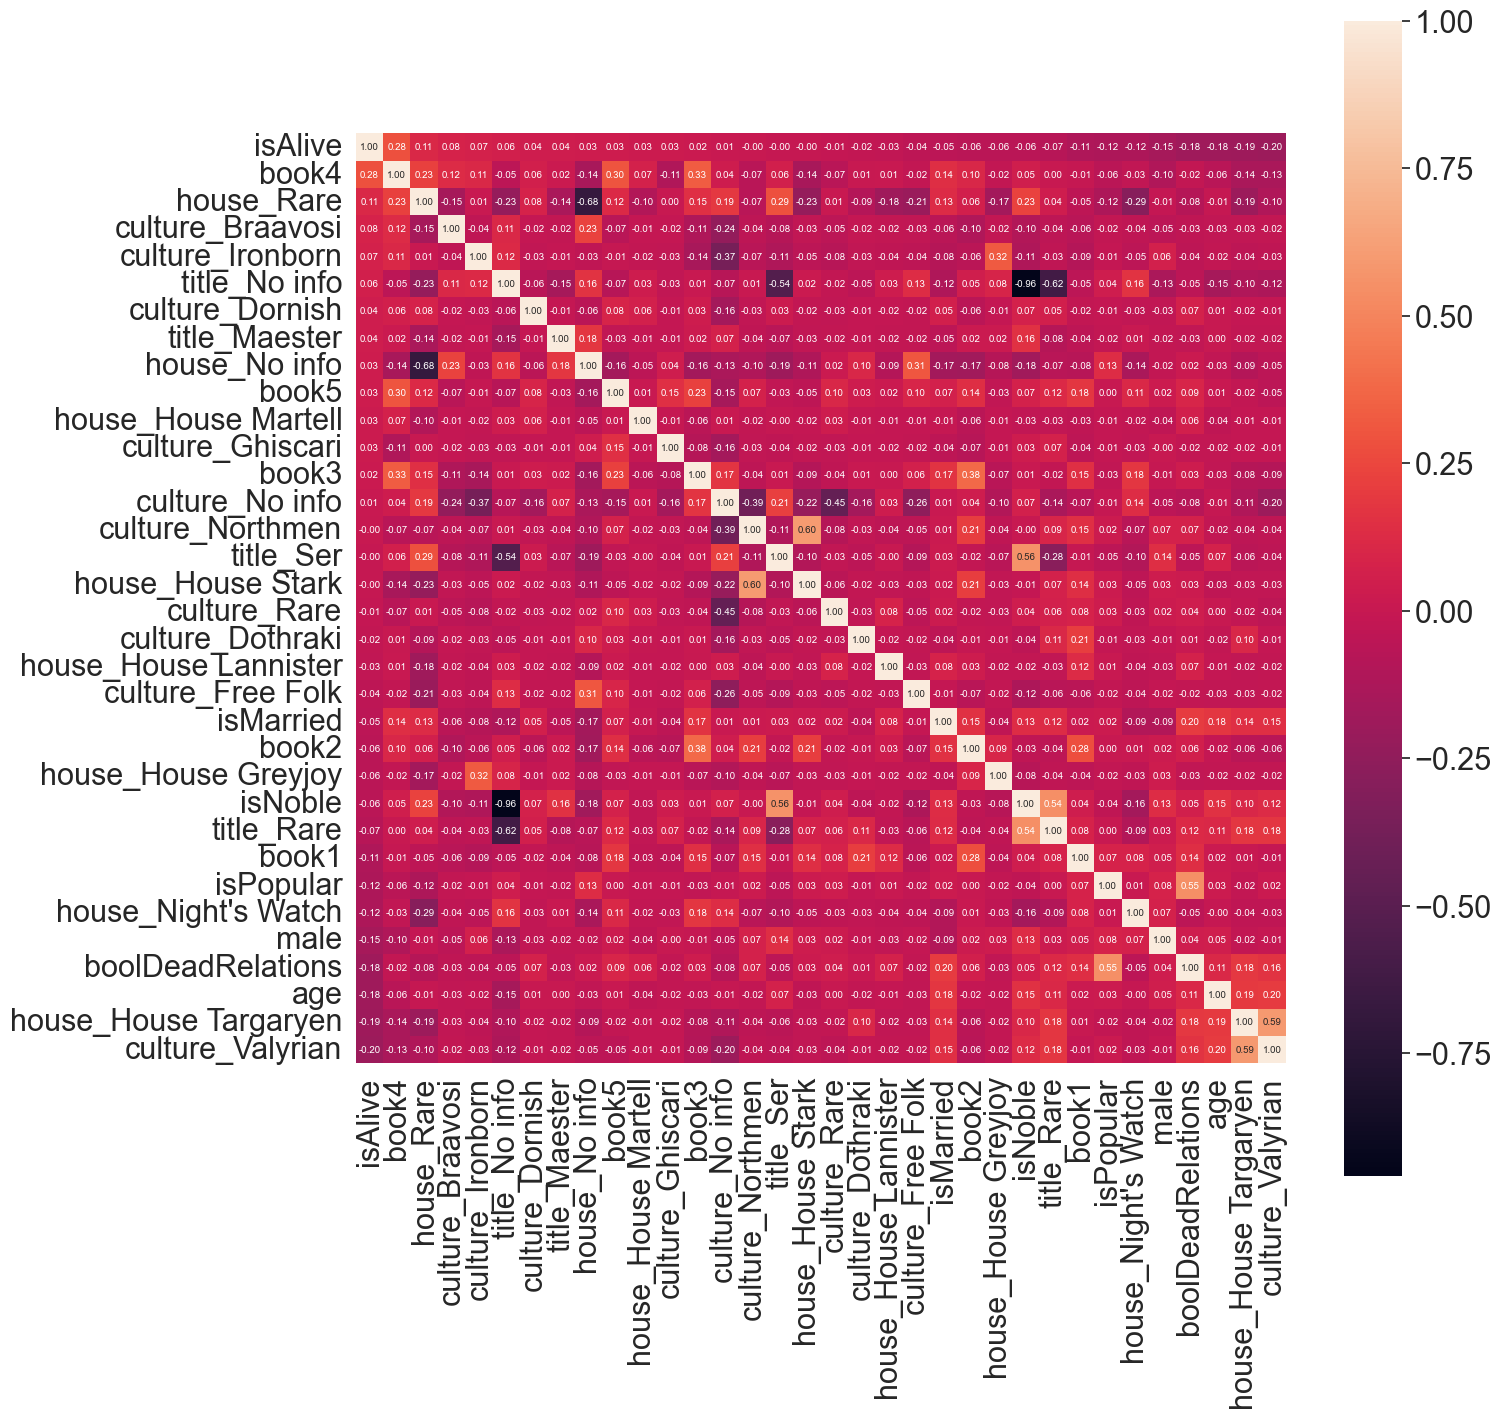

In [119]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 15))
k = df_train.columns.shape[0] # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Удаляем столбцы, имеющие корреляцию с целевой переменной по модулю меньше 0.06 

In [120]:
corrmat = df_train.corr()
df_train = df_train.drop(corrmat[(corrmat['isAlive'].values < 0.06) & (corrmat['isAlive'].values > -0.06)]['isAlive'].index, axis=1)
df_test = df_test.drop(corrmat[(corrmat['isAlive'].values < 0.06) & (corrmat['isAlive'].values > -0.06)]['isAlive'].index, axis=1)

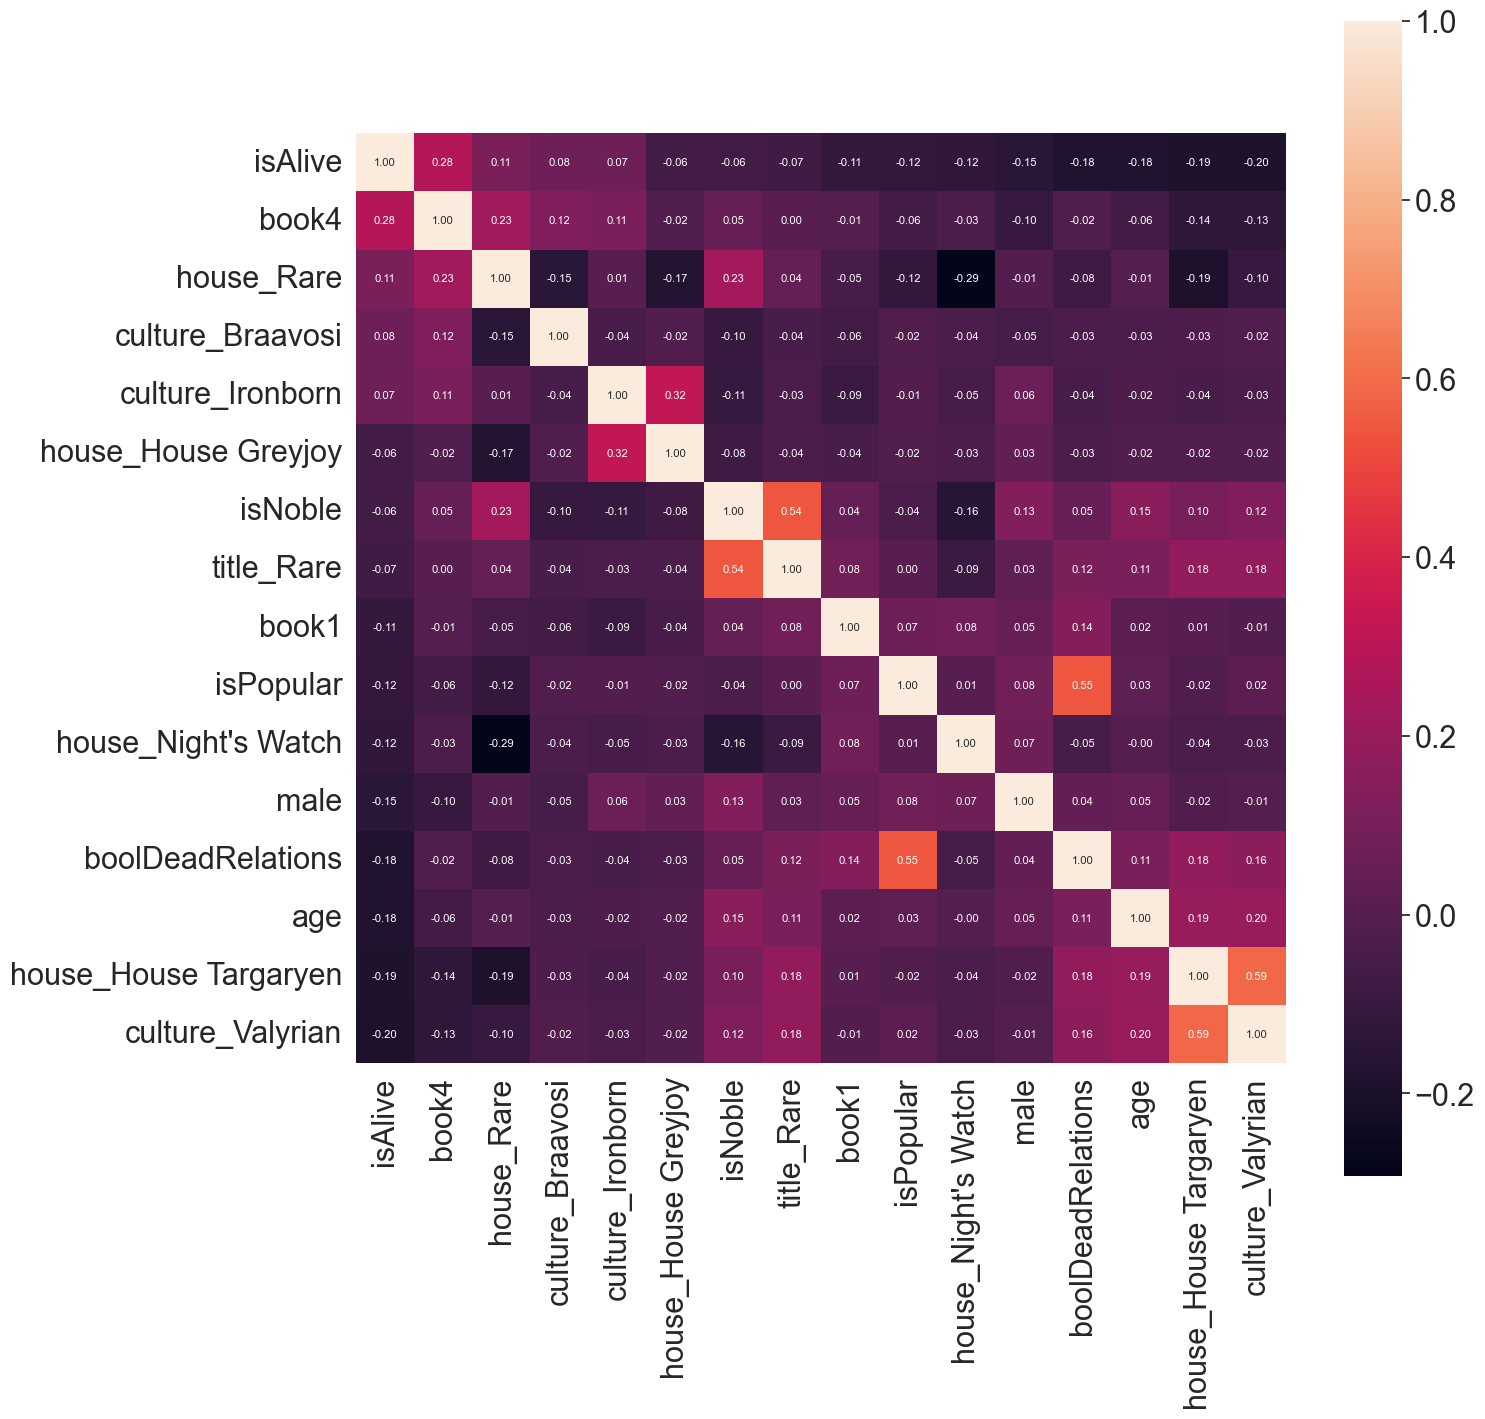

In [121]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 15))
k = df_train.columns.shape[0] # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

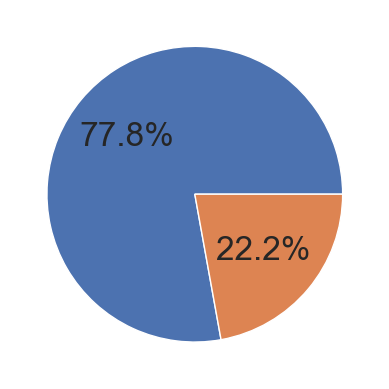

In [122]:
plt.pie(df_train['isAlive'].value_counts(), autopct='%1.1f%%')
plt.show()

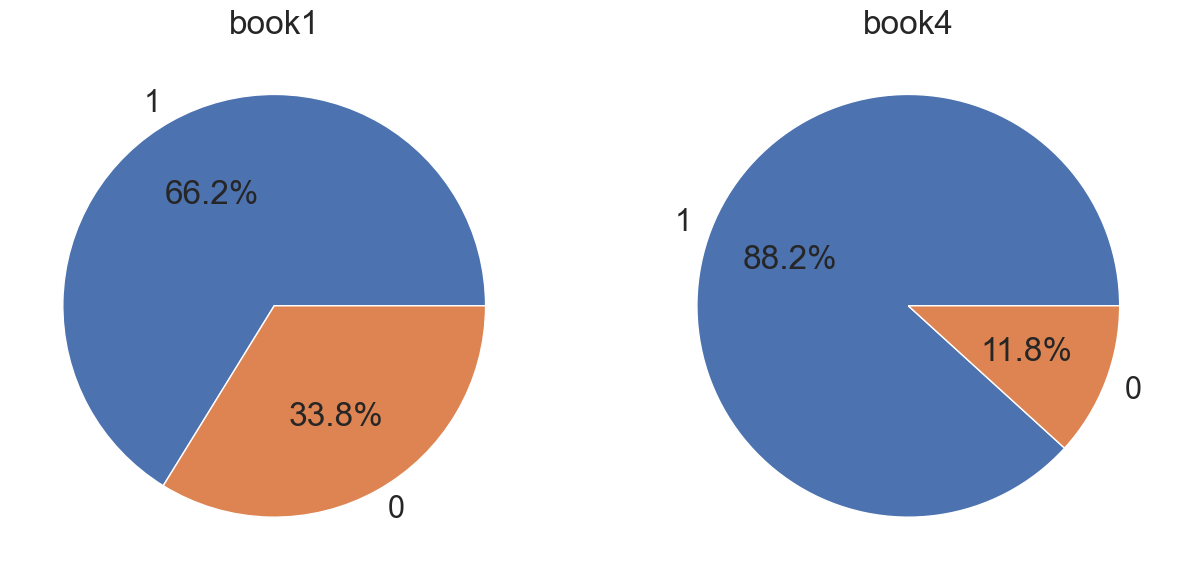

In [125]:
data1 = df_train[df_train['book1'] == 1]['isAlive'].value_counts()
#data2 = df_train[df_train['book2'] == 1]['isAlive'].value_counts()
data3 = df_train[df_train['book4'] == 1]['isAlive'].value_counts()
#data4 = df_train[df_train['book5'] == 1]['isAlive'].value_counts()

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
#ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
#ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')

ax1.set_title("book1")
#ax2.set_title("book2")
ax3.set_title("book4")
#ax4.set_title("book5")

plt.show()

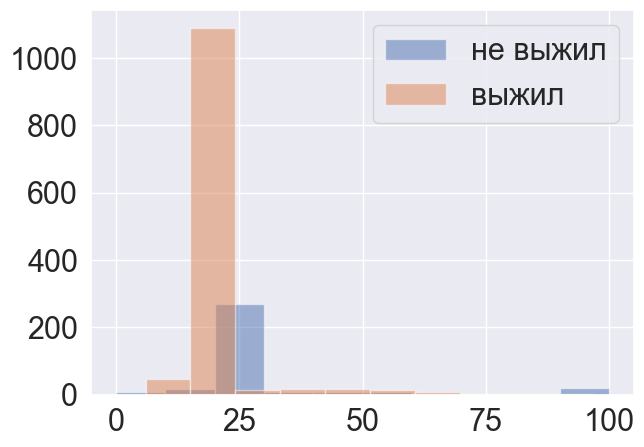

In [126]:
plt.figure(figsize=(7, 5))

plt.hist(df_train['age'][df_train['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(df_train['age'][df_train['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

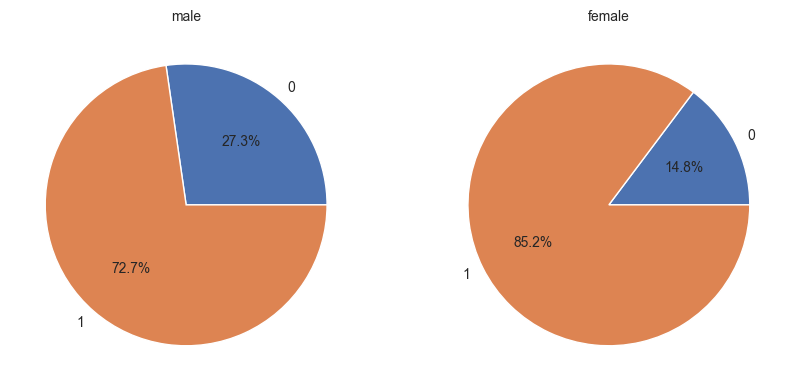

In [127]:
data_1 = df_train[df_train['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df_train[df_train['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('male', fontsize=10)
ax2.set_title('female', fontsize=10)

plt.show()

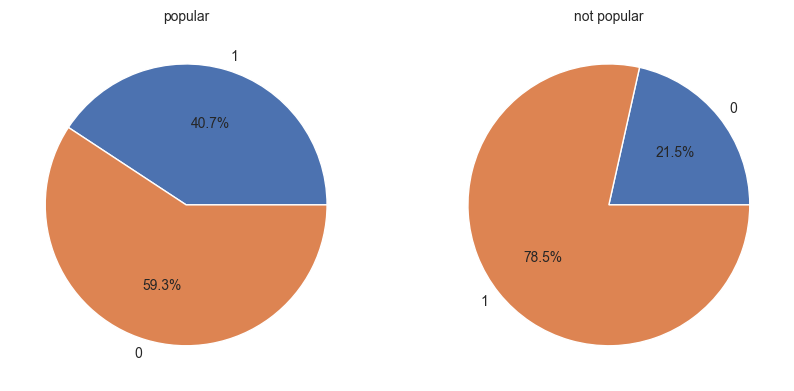

In [128]:
data_1 = df_train[df_train['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = df_train[df_train['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('popular', fontsize=10)
ax2.set_title('not popular', fontsize=10)

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

## У меня выходило переобучение на "1" в isAlive, поэтому я отсортировал датафрейм по столбцу isAlive и таким образом в X_train содержится лучшее соотношение "1" и "0" (на accuracy это повлияло в положительную сторону)

In [150]:
df_train = df_train.sort_values(by='isAlive', ascending=True)
df_train['isAlive']

S.No
1       0
1015    0
1011    0
1006    0
1004    0
       ..
1489    1
1490    1
24      1
20      1
779     1
Name: isAlive, Length: 1557, dtype: int64

In [282]:
X = df_train.drop(columns=['isAlive']).values
y = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## MinMax для age

In [304]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)


## Часть 2. Обучение моделей

## Я посмотрел на первые результаты accuracy и лучшими из них были RandomForestClassifier и AdaBoostClassifier 
## => я решил подобрать гиперпараметры через GridSearch и в дальнейшем самостоятельно доподбирал гиперпараметры с меньшим шагом

## Также я подобрал гиперпараметры для KNeighborsClassifier, но должного результата это не дало

## p.s. модели с подобранными гиперпараметрами названы: rand_forest_gs и ada_boost_gs

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [305]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [306]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [307]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression()

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [308]:
# Шаг 1. создание модели
ada_boost_gs = AdaBoostClassifier(n_estimators=30)
ada_boost = AdaBoostClassifier()

rand_forest_gs = RandomForestClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=3,
                       n_estimators=48)
rand_forest = RandomForestClassifier()
gaussian_pc = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
knn_c = KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1)
svc = SVC()
decision_tree_c = DecisionTreeClassifier()
# Шаг 2. обучение модели

ada_boost.fit(X_train, y_train)
ada_boost_gs.fit(X_train, y_train)
rand_forest_gs.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
gaussian_pc.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn_c.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree_c.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных

y_pred_ada = ada_boost.predict(X_test)
y_pred_ada_gs = ada_boost_gs.predict(X_test)
y_pred_rand_gs = rand_forest_gs.predict(X_test)
y_pred_rand = rand_forest.predict(X_test)
y_pred_gaussian_pc = gaussian_pc.predict(X_test)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
y_pred_knn_c = knn_c.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = decision_tree_c.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [309]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [310]:
print("Accuracy LogisticRegression: %.4f" % accuracy_score(y_test, y_pred))

Accuracy LogisticRegression: 0.8953


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [311]:
print("Accuracy AdaBoostClassifier : %.4f" % accuracy_score(y_test, y_pred_ada))
print("Accuracy AdaBoostClassifieGS : %.4f" % accuracy_score(y_test, y_pred_ada_gs))
print("Accuracy RandomForestClassifierGS: %.4f" % accuracy_score(y_test, y_pred_rand_gs))
print("Accuracy RandomForestClassifier: %.4f" % accuracy_score(y_test, y_pred_rand))
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy_score(y_test, y_pred_gaussian_pc))
print("Accuracy GaussianNB: %.4f" % accuracy_score(y_test, y_pred_gaussian_nb))
print("Accuracy KNeighborsClassifier: %.4f" % accuracy_score(y_test, y_pred_knn_c))
print("Accuracy SVC: %.4f" % accuracy_score(y_test, y_pred_svc))
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy_score(y_test, y_pred_tree))


Accuracy AdaBoostClassifier : 0.5919
Accuracy AdaBoostClassifieGS : 0.5876
Accuracy RandomForestClassifierGS: 0.9295
Accuracy RandomForestClassifier: 0.5769
Accuracy GaussianProcessClassifier: 0.8889
Accuracy GaussianNB: 0.8739
Accuracy KNeighborsClassifier: 0.4957
Accuracy SVC: 0.8996
Accuracy DecisionTreeClassifier: 0.6068


In [ ]:
"""
from sklearn.model_selection import GridSearchCV 

model = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
             'weights': ['uniform', 'distance'], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size': [20, 25, 30, 35, 40],
             'p': [1,2,3]}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)
"""

In [261]:
"""
from sklearn.model_selection import GridSearchCV 

model = RandomForestClassifier()
parameters = {'max_depth': np.arange(1, 20), 
            'min_samples_leaf': np.arange(2, 20),
             'n_estimators': [40, 45, 50, 55, 60],
             'max_leaf_nodes': [1,2,3,4,5,6,7,'None']}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)
"""

C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Санек\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

RandomForestClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=3,
                       n_estimators=48)
{'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 3, 'n_estimators': 48}
0.7219999999999999


In [ ]:
"""
model = AdaBoostClassifier()
parameters = {'n_estimators': np.arange(1, 100)}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_clf.fit(X, y)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)
"""

Выберите лучшую модель.

## Лучшая модель rand_forest_gs с accurasy в степике = 

In [312]:
X_df_test = df_test.values

scaler = MinMaxScaler()
scaler.fit(X_df_test)
X_df_test = scaler.transform(X_df_test)

y_test_pred = rand_forest_gs.predict(X_df_test)
y_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [237]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [313]:
submission = pd.read_csv("DLS/submission.csv", index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [314]:
submission['isAlive'] = y_test_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [315]:
submission.to_csv("DLS/new1_submission.csv", index=False)